<a href="https://colab.research.google.com/github/ShreyaWangi/2KE22CS142/blob/main/lab_9_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 80.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       

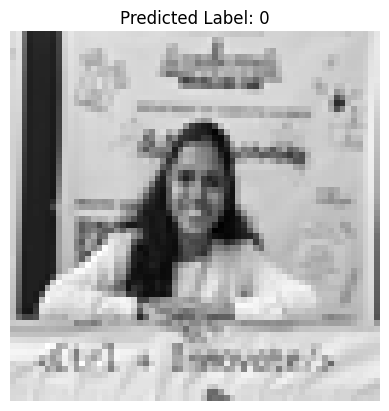

In [3]:
# === Mount Google Drive ===
from google.colab import drive
drive.mount('/content/drive')

# === Imports ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from PIL import Image
import os

# === Load Olivetti Faces Dataset ===
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# === Train Naive Bayes Model ===
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# === Evaluate Model ===
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f'\nCross-validation accuracy: {cross_val_score(model, X, y, cv=5).mean() * 100:.2f}%')

# === Predict Your Image ===

# Update this path to your image on Google Drive
image_path = '/content/drive/My Drive/shreya.jpg'

# Check if file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at: {image_path}")

# Load and preprocess image
your_img = Image.open(image_path).convert('L')  # convert to grayscale
your_img = your_img.resize((64, 64))  # resize to 64x64
your_img_array = np.array(your_img) / 255.0  # normalize
your_img_flat = your_img_array.reshape(1, -1)  # flatten

# Check compatibility
if your_img_flat.shape[1] != X.shape[1]:
    raise ValueError(f"Your image has {your_img_flat.shape[1]} features, but model expects {X.shape[1]}.")

# Predict
your_pred = model.predict(your_img_flat)[0]
print(f"\nPredicted label for your image: {your_pred}")

# Show your image
plt.imshow(your_img_array, cmap='gray')
plt.title(f"Predicted Label: {your_pred}")
plt.axis('off')
plt.show()